In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Signal + Noise

In [2]:
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n)

# sin wave
signal = np.sin(1.2*2*np.pi*t)
noise = 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)
data = signal + noise

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


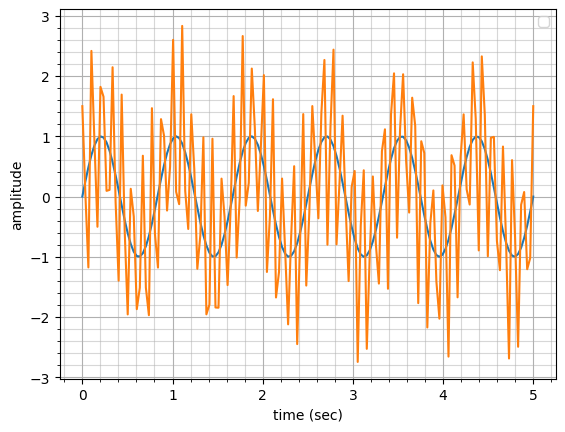

In [3]:
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, signal, label="signal")
plt.plot(t, data, label="noised signal")

# Low Pass Filter

In [4]:
cutoff = 2      # desired cutoff frequency of the filter, Hz
order = 2       # sin wave can be approx represented as quadratic

In [14]:
def butter_lowpass_filter(
    signal: np.ndarray, 
    sampling_rate: int, 
    cutoff: int, 
    order: int
):
    """Butterworth low-pass filter
    See https://youtu.be/dmzikG1jZpU?t=110
    Args:
        signal: sigal to filter
        sampling_rate: sampling rate to sample the signal
        cutoff: cut-off frequency (Hz)
        order: filter gain paramenter n with larger value gives acute gain change.
    """
    nyquist = int(sampling_rate / 2)
    # Get the filter coefficients 
    b, a = sp.signal.butter(
        N=order, 
        Wn=cutoff / nyquist,
        btype='low', 
        analog=False,
        output="sos"
    )
    y = sp.signal.filtfilt(b, a, signal)
    
    return y

In [ ]:
def butter_bandpass(lowcut, highcut, fs, order=5):
        nyq = 0.5 * fs
        low = lowcut / nyq
        high = highcut / nyq
        sos = butter(order, [low, high], analog=False, btype='band', output='sos')
        return sos

def butter_bandpass_filter(
    signal: np.ndarray, 
    lowcut,
    highcut, fs, order=5):
        sos = butter_bandpass(lowcut, highcut, fs, order=order)
        y = sosfilt(sos, data)
        return y

In [15]:
y = butter_lowpass_filter(signal=data, sampling_rate=fs, cutoff=cutoff, order=order)

ValueError: not enough values to unpack (expected 2, got 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


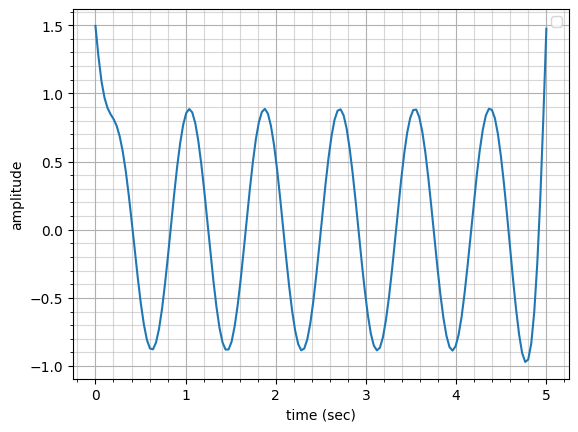

In [16]:
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor', linestyle='-', alpha=0.5)
plt.minorticks_on()
plt.ylabel("amplitude")
plt.xlabel("time (sec)")
plt.legend()
plt.plot(t, y, label="filtered signal")